In [36]:
import ROOT
import numpy as np, pandas as pd

import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
#plt.set_cmap("tab20")

#presets for plot style
from scipy.constants import golden
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=18)
rc('xtick', labelsize=18)
rc('ytick', labelsize=18)
rc('axes', labelsize=18)
rc('legend', fontsize=18)

import matplotlib.patches as patches

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [37]:
f=ROOT.TFile("out.root")
fcal=f.Get("fcal")

In [38]:
d=dict(ADCL=[],ADCR=[],TDCL=[], TDCR=[])
for fc in fcal:
    
    if(len(fc.TDC_TDC)!=0):
        nL=0
        nR=0
        dL=0
        dR=0
        for TDC, order, ADC  in zip(fc.TDC_TDC, fc.TDC_order, fc.ADC_ADC):
            if order==2:
                d["TDCR"].append(TDC)
                d["ADCR"].append(ADC)
            if order==3:
                d["TDCL"].append(TDC)
                d["ADCL"].append(ADC)
df = pd.DataFrame(d)


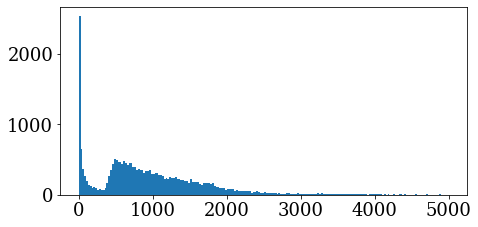

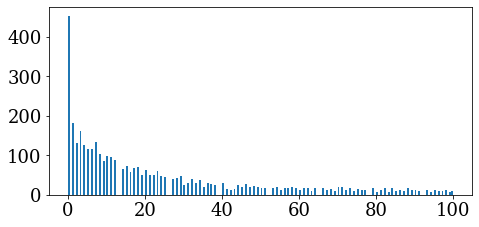

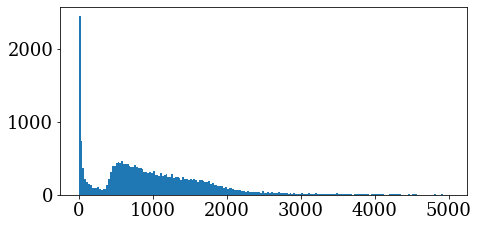

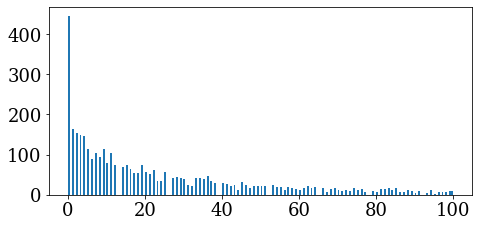

In [39]:
plt.hist(df.ADCL,bins=200, range=(0, 5000))
plt.show()
plt.hist(df.ADCL,bins=200, range=(0, 100))
plt.show()

plt.hist(df.ADCR,bins=200, range=(0, 5000))
plt.show()
plt.hist(df.ADCR,bins=200, range=(0, 100))
plt.show()

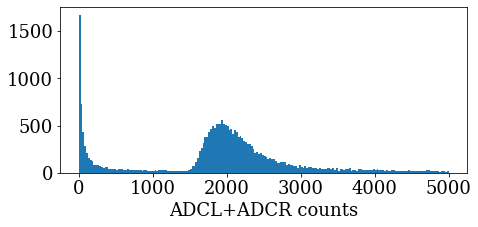

<Figure size 504x252 with 0 Axes>

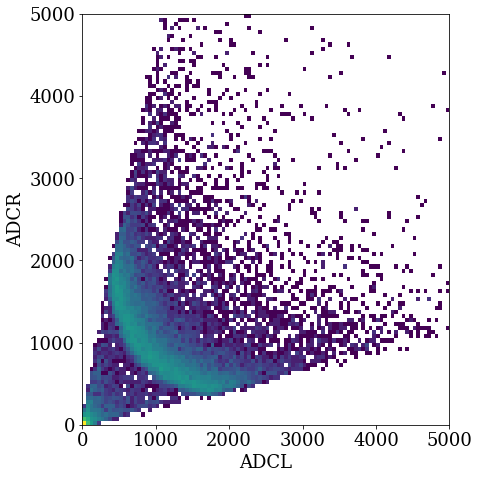

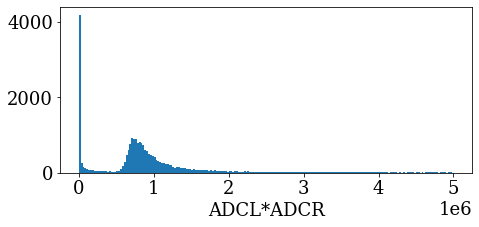

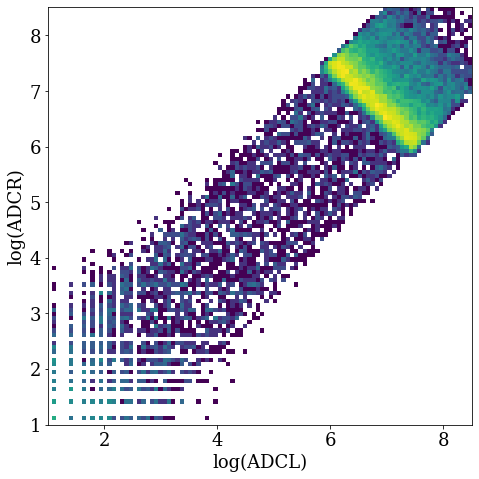

In [46]:
plt.hist(df.ADCL+df.ADCR,bins=200, range=(0, 5000))
plt.xlabel("ADCL+ADCR counts")
plt.show()

plt.set_cmap("viridis")
fig, axs=plt.subplots(1,1,figsize=(7,7))
plt.hist2d(df.ADCL,df.ADCR,bins=(100,100), range=[(0, 5000)]*2, norm=mpl.colors.LogNorm())
plt.xlabel("ADCL")
plt.ylabel("ADCR")
plt.show()


plt.hist(df.ADCL*df.ADCR,bins=200, range=(0, 5000000))
plt.xlabel("ADCL*ADCR")
plt.show()

fig, axs=plt.subplots(1,1,figsize=(7,7))
plt.hist2d(np.log(df.ADCL),np.log(df.ADCR),bins=(100,100), range=[(1, np.log(5000))]*2, norm=mpl.colors.LogNorm())
plt.xlabel("log(ADCL)")
plt.ylabel("log(ADCR)")
plt.show()